In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Some functions for plotting. The code holds no conceptual value.

In [3]:
def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_table(r):
    """
    Generate a table of 1000 x,y data points in standard units
    whose correlation is approximately equal to r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

And you especially don't need to worry about these two functions here!

In [4]:
def demographics_errors(slope, intercept):
    # Use four convenient points from the original data
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    # Plot a line with the slope and intercept you specified:
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    # Plot red lines from each of the four points to the line
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)

In [5]:
def show_demographics_rmse(slope, intercept):
    demographics_errors(slope, intercept)
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", round(mse ** 0.5, 2))

## Review

In [7]:
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)

In [9]:
def slope(t, x, y):
    """Computes the slope of the regression line"""
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """Computes the intercept of the regression line"""
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

## New material

In [11]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.sample().show(5)

State,District,Median Income,Percent voting for Clinton,College%
New Jersey,"Congressional District 9 (115th Congress), New Jersey",64964,64.3,33.6
Wisconsin,"Congressional District 1 (115th Congress), Wisconsin",61589,42.3,28.2
Oklahoma,"Congressional District 4 (115th Congress), Oklahoma",55183,28.3,25.5
New York,"Congressional District 4 (115th Congress), New York",100178,53.4,42.5
Ohio,"Congressional District 13 (115th Congress), Ohio",42430,51.1,23.7


Today, we will focus on just two of the variables in this dataset.

In [12]:
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


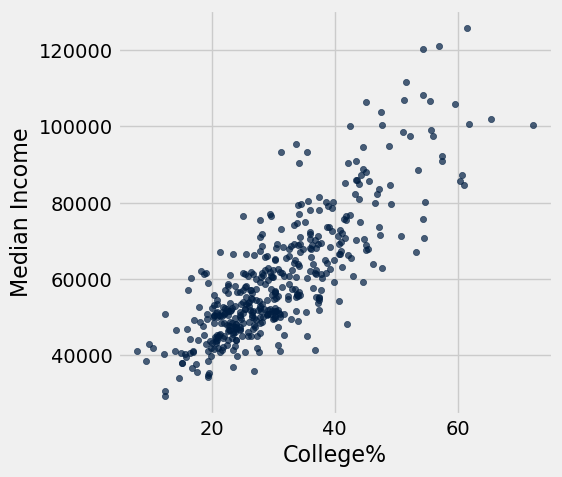

In [13]:
demographics.scatter('College%', 'Median Income')

In [14]:
correlation(demographics, 'College%', 'Median Income')

0.81846485171413352

In [15]:
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
make_array(regression_slope, regression_intercept)

array([  1270.70168946,  20802.57776668])

### How well are we doing at predicting *y*?

In [16]:
def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [17]:
predicted = fitted_values(demographics, 'College%', 'Median Income')
predicted[1:6]

array([ 48503.87459699,  49774.57628645,  42404.50648756,  59304.83895743,
        67437.32977   ])

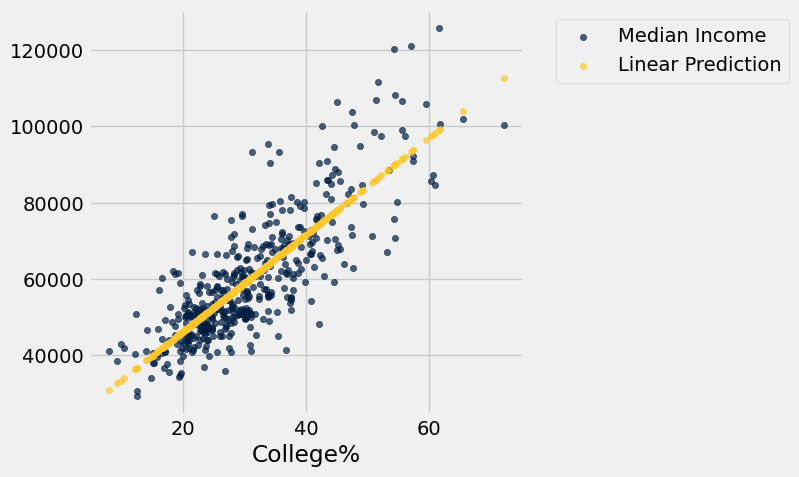

In [18]:
demographics = demographics.with_column(
    'Linear Prediction', predicted)
demographics.scatter('College%')

In [19]:
actual = demographics.column('Median Income')
errors = actual - predicted

In [20]:
demographics.with_column('Error', errors).show(6)

Median Income,College%,Linear Prediction,Error
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33


### How might we find the size of a typical error?

In [21]:
mse = np.average(errors ** 2)
mse

88332095.268617392

In [23]:
rmse = np.average(errors ** 2) ** 0.5
rmse

9398.5155885712811

For a few diffrent lines, we can:
- visualize the errors for a few select points
- as well as see the total $\text{RMSE}$

Root mean squared error: 11559.09


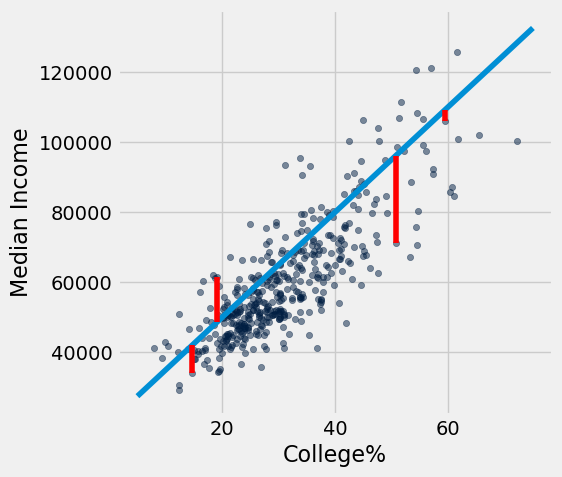

In [24]:
show_demographics_rmse(1500, 20000)

Root mean squared error: 30247.88


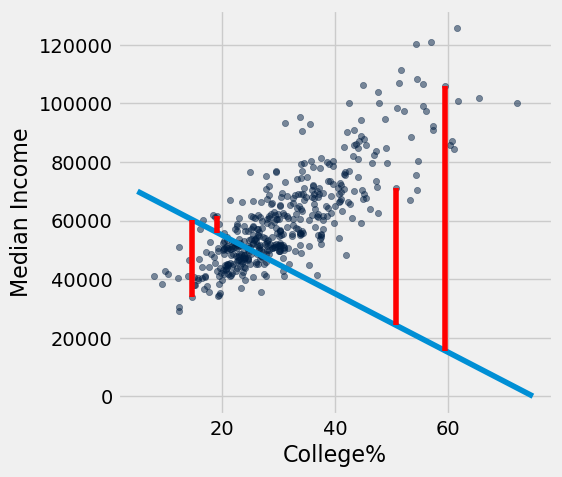

In [25]:
show_demographics_rmse(-1000, 75000)

Root mean squared error: 9398.52


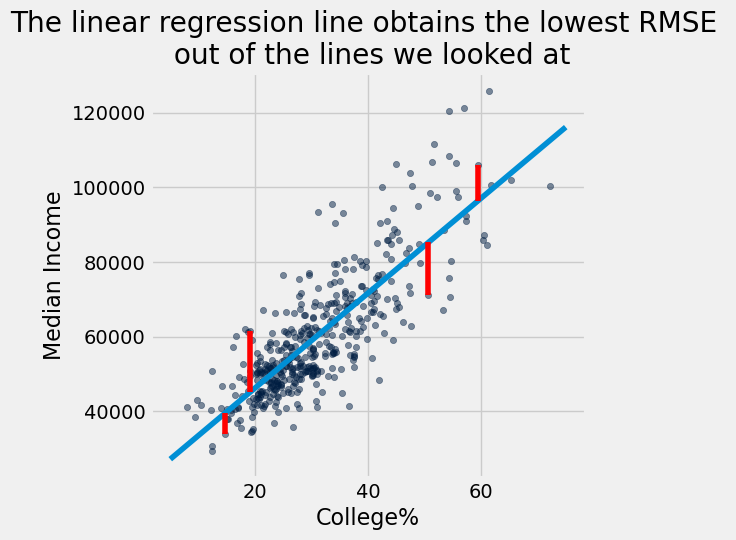

In [26]:
show_demographics_rmse(regression_slope, regression_intercept)
plots.title('The linear regression line obtains the lowest RMSE \n out of the lines we looked at');

### Numerical optimization is widely used!

A nonlinear function is plotted below, and a function definition is then given.

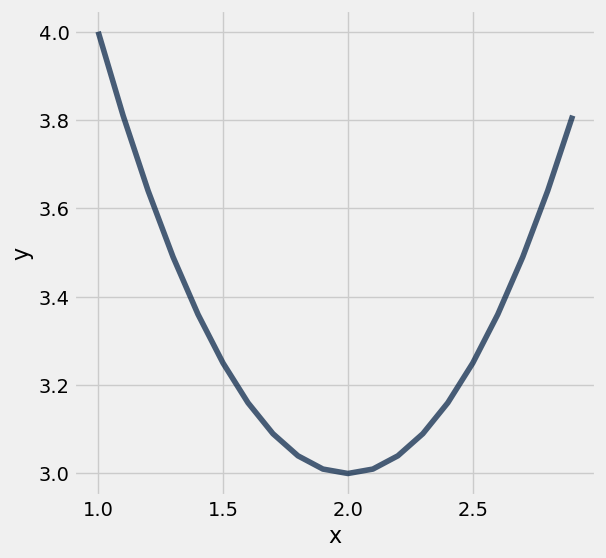

In [27]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [28]:
def f(x):
    return ((x-2)**2) + 3

In [29]:
minimize(f)

1.9999999946252267

A very, very complicated function:

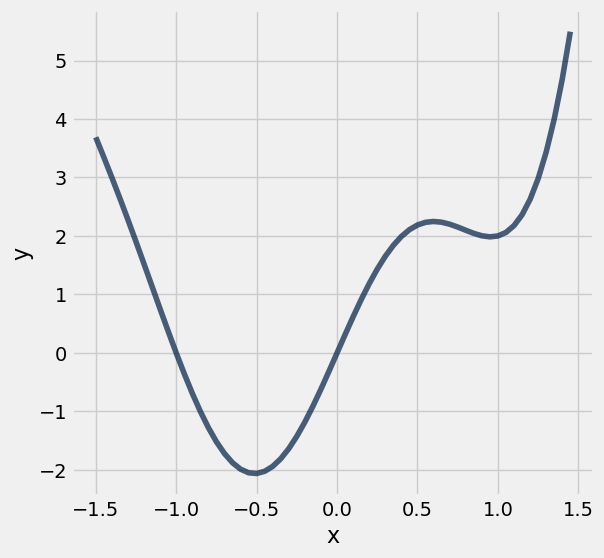

In [30]:
x = np.arange(-1.5, 1.5, 0.05)
y2 = 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 
Table().with_columns('x', x, 'y', y2).plot('x')

In [31]:
def very_very_complicated_function(x):
    return 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 

In [32]:
minimize(very_very_complicated_function)

-0.5126437620940081

### Numerical optimization example: $\text{RMSE}$

In [34]:
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [35]:
demographics_rmse(1500, 20000)

11559.086490075999

In [36]:
demographics_rmse(-1000, 75000)

30247.883767944502

### The linear regression line is the best linear predictor

In [37]:
make_array(regression_slope, regression_intercept)

array([  1270.70168946,  20802.57776668])

In [38]:
minimize(demographics_rmse)

array([  1270.70168805,  20802.57933807])

### (Cool material) Nonlinear regression

In [40]:
shotput = Table.read_table('shotput.csv')
shotput.show(6)

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13


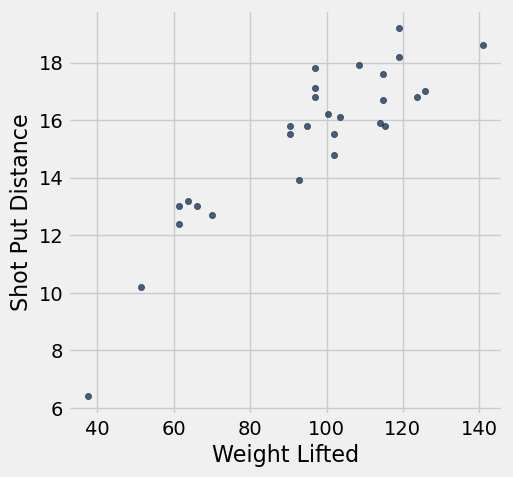

In [41]:
shotput.scatter('Weight Lifted')

#### Linear function 
$$
f(x) ~=~ ax + b 
$$

for constants $a$ and $b$.


In [43]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

In [44]:
best_line = minimize(shotput_linear_rmse)
best_line

array([ 0.09834382,  5.95962883])

In [45]:
weights = shotput.column(0)

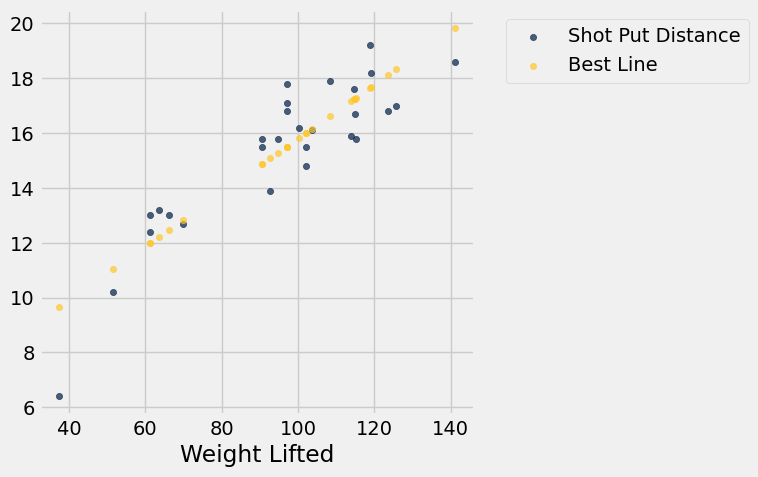

In [46]:
linear_fit = best_line.item(0)*weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

#### Quadratic function

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.

In [47]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

In [48]:
best_quad = minimize(shotput_quadratic_rmse)
best_quad

array([ -1.04003731e-03,   2.82706003e-01,  -1.53167618e+00])

Prediction for a person who can lift 100 kg:

In [49]:
weight_lifted_kg = 100 

prediction = (-0.00104)*(weight_lifted_kg**2) + 0.2827*weight_lifted_kg - 1.5318
prediction

16.3382

In [50]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)

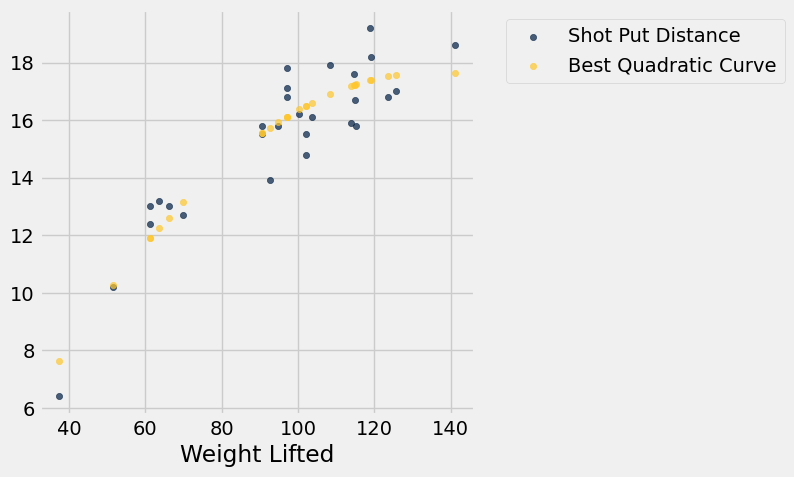

In [51]:
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)

**Task**: Find which model is a better fit.

In [53]:
shotput_quadratic_rmse(-1.04003731e-03,   2.82706003e-01,  -1.53167618e+00)

0.98188452306100782

In [52]:
shotput_linear_rmse(0.09834382,  5.95962883)

1.219444484505928